In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import color
from skimage.io import imread

In [2]:
gr = '#333333'

## Signal generation

$$ y(t) = \sum_k a_k sin(2\pi f t) + n(t)$$

where:

- a_k coefficient;
- f signal frequency, in Hz;
- n(t) gaussian noise with mean zero and stdev one ( $\mu = 0$, $\sigma = 1$).

In [15]:
fs = 100 / np.pi
t = np.arange(0,5*np.pi,1/fs)
N = len(t)
tempo_total = N / fs
f = 5
signal = np.sin(2*np.pi*f*t) + np.random.normal(0,1,len(t)) + 0.1*np.sin(2*np.pi*500*t)
print(N,fs,f,fs/f,fs/f > 2,tempo_total)

500 31.830988618379067 5 6.366197723675813 True 15.707963267948966


## Image generation

The generated signal is plotted in a x-y type chart with its line in the color white and the background in black, emulating the binary flow images captured in the tests.

The axis and borders are removed and the image is exported as a png file.

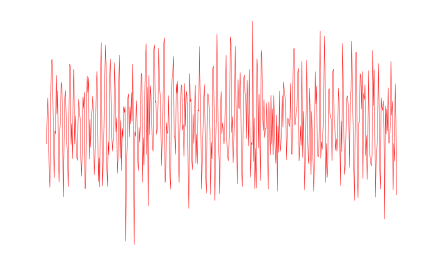

In [16]:
dpi = 96
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,signal,'r',linewidth=0.4)
#ax.set_xlim([0,500])
plt.axis('off')
plt.tight_layout()
fig.savefig(r'D:\Mestrado\Imagens\Imagens teste\f_01.png',facecolor='black',dpi=100)

## Image loading and processing

The png file is then loaded into the workspace, where it is compared with the generated one (evaluating eventual sharpness losses due to the compression process) and headed to the Fourier analysis via two techniques:

- Interface detection;
- Image superposition.

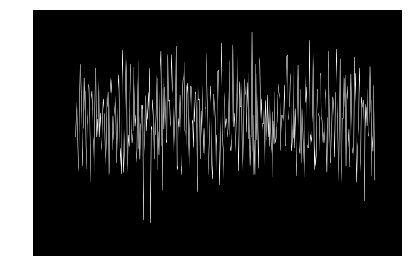

In [17]:
test_image = imread(r'D:\Mestrado\Imagens\Imagens teste\f_01.png',as_grey=True)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(test_image[:,:],cmap=plt.cm.binary_r)
plt.axis('off')
plt.tight_layout();

## Interface detection

### Importing library

In [18]:
from my_modules.inthei import *

### Morphological processes

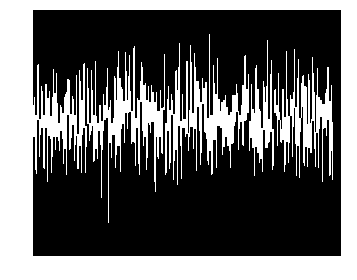

In [19]:
proc_image = im_proc(test_image[:,69:569])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(proc_image,cmap=plt.cm.binary_r)
plt.axis('off')
plt.tight_layout();

### Interface detection routine

In [20]:
dict_image, height_image = interface_height(proc_image.T,1)

### Resulting time signal

(0, 500)

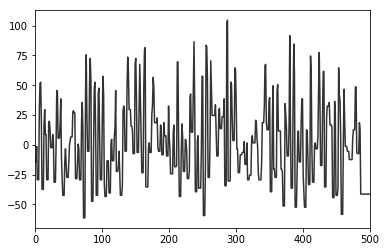

In [21]:
height_image = 400 - np.array(height_image)
plt.figure()
plt.plot(height_image-np.mean(height_image),color=gr)
plt.xlim([0,len(height_image)])
#plt.ylim([0,1.2*max(height_image)]);

### Fourier analysis

Dominant frequency: 5.157 Hz
index: 81


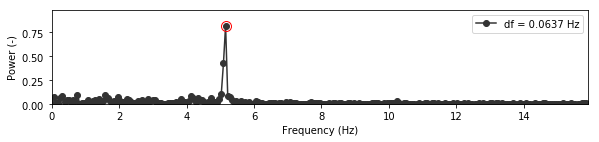

In [22]:
sig = height_image - np.mean(height_image)
#fs = 1
Y = np.fft.fft(sig,norm='ortho')
Y = 2 * Y / len(Y)
Y[0] = Y[0] / 2
f = np.fft.fftfreq(len(Y),d=1/fs)

fig = plt.figure(figsize=(800/dpi,200/dpi))
ax = fig.add_subplot(111)
ax.plot(f[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)])**2,'o-',
        color=gr,label='df = {:.4f} Hz'.format(f[1]-f[0]))
ax.set_xlim([0, fs/2])
ax.set_ylim([0, 1.2*np.max(np.abs(Y[0:int(len(Y)/2)])**2)])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,4))
ax.yaxis.major.formatter._useMathText = True
ax.legend(loc='best',numpoints=1,fontsize=10)
idx = np.argmax(np.abs(Y[0:int(len(Y)/2)])**2)
ax.plot(f[idx],np.abs(Y[idx])**2,'o',mfc='None',mec='r',ms=10)
ax.set_ylabel('Power (-)')
ax.set_xlabel('Frequency (Hz)')
plt.tight_layout();
print('Dominant frequency: {:.3f} Hz\nindex: {}'.format(f[idx],idx))

## Image superposition

### Load image

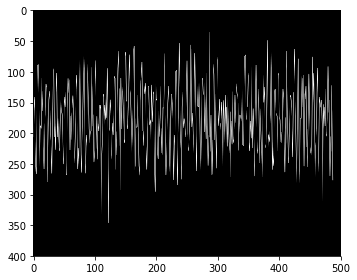

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(test_image[:,69:569],cmap=plt.cm.binary_r)
plt.tight_layout();

### Time signal

(0, 500)

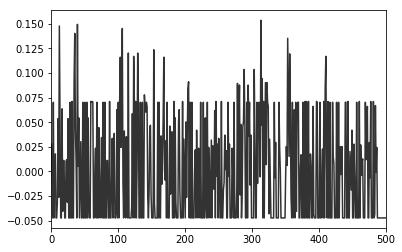

In [24]:
x = 190
plt.figure()
plt.plot(test_image[x,69:569]- np.mean(test_image[x,69:569]),color=gr)
plt.xlim([0,500])
#plt.ylim([0,1.2])

### Fourier analysis

Dominant frequency: 10.250 Hz
index: 161


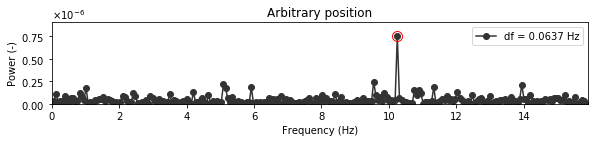

In [25]:
sig2 = test_image[x,69:569] - np.mean(test_image[x,69:569])
#fs = 1
Y = np.fft.fft(sig2,norm='ortho')
Y = 2 * Y / len(Y)
Y[0] = Y[0] / 2
f = np.fft.fftfreq(len(Y),d=1/fs)

fig = plt.figure(figsize=(800/dpi,200/dpi))
ax = fig.add_subplot(111)
ax.plot(f[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)])**2,'o-',
        color=gr,label='df = {:.4f} Hz'.format(f[1]-f[0]))
ax.set_xlim([0, fs/2])
ax.set_ylim([0, 1.2*np.max(np.abs(Y[0:int(len(Y)/2)])**2)])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,4))
ax.yaxis.major.formatter._useMathText = True
ax.legend(loc='best',numpoints=1,fontsize=10)
idx = np.argmax(np.abs(Y[0:int(len(Y)/2)])**2)
ax.plot(f[idx],np.abs(Y[idx])**2,'o',mfc='None',mec='r',ms=10)
ax.set_ylabel('Power (-)')
ax.set_xlabel('Frequency (Hz)')
ax.set_title('Arbitrary position')
plt.tight_layout();
print('Dominant frequency: {:.3f} Hz\nindex: {}'.format(f[idx],idx))

### Range of pixels

({5.156620156177409: 59, 10.249578335118059: 41}, 7.2447330095430758)

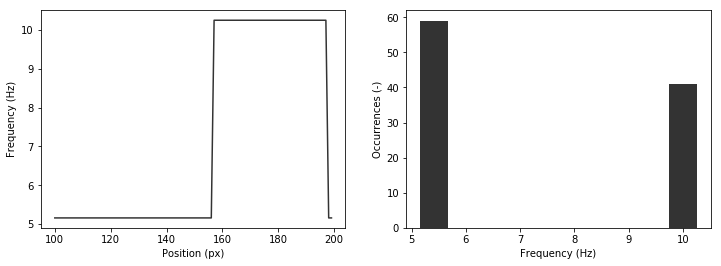

In [26]:
idxs,freq = [],[]
for x in range(100,200):
    sig2 = test_image[x,69:569] - np.mean(test_image[x,69:569])
    Y = np.fft.fft(sig2,norm='ortho')
    Y = 2 * Y / len(Y)
    Y[0] = Y[0] / 2
    f = np.fft.fftfreq(len(Y),d=1/fs)
    
    idx = np.argmax(np.abs(Y[0:int(len(Y)/2)])**2)
    freq.append(f[idx]),idxs.append(idx)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.plot(range(100,200),freq,color=gr)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('Position (px)')
ax2 = fig.add_subplot(122)
ax2.hist(freq,color=gr)
ax2.set_ylabel('Occurrences (-)')
ax2.set_xlabel('Frequency (Hz)')
{i:freq.count(i) for i in set(freq)},np.mean(freq)